### Тема "Обучение с учителем"

**Задание 1**

Импортируйте библиотеки pandas и numpy.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и Y из этих данных.

Разбейте эти датафреймы н а тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [2]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston, load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
Y = pd.DataFrame(boston["target"], columns=["price"])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,
                                                    random_state=42)

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)

In [9]:
lr_score = r2_score(y_test, y_pred)
lr_score

0.7112260057484974

**Задание 2**

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель
 LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [10]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12,
                              random_state=42)

In [11]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [12]:
y_pred = model.predict(X_test)

In [13]:
model_score = r2_score(y_test, y_pred)
model_score

0.87472606157312

В модели случайного леса предсказание получается путём усреднения ответов 
множества деревьев (100), такая модель лучше улавливает нелинейные закономерности 
в данных. В то время, как построенная нами модель линейной регрессии обладает 
недостаточной сложностью для нахождения нелинейных закономерностей.

**Задание 3**

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [14]:
# ?RandomForestRegressor

In [15]:
model.feature_importances_.sum()

1.0

In [16]:
importances = {i: j for i, j in zip(boston['feature_names'], 
                                    model.feature_importances_)}

In [17]:
importances

{'AGE': 0.014298644996729816,
 'B': 0.0124508530140077,
 'CHAS': 0.0012362448947738866,
 'CRIM': 0.03167574073875602,
 'DIS': 0.06397256527230023,
 'INDUS': 0.007138131415845556,
 'LSTAT': 0.4158473181914483,
 'NOX': 0.014268969875348304,
 'PTRATIO': 0.01808107640502542,
 'RAD': 0.005281218312887839,
 'RM': 0.4026817857034993,
 'TAX': 0.011524934553144586,
 'ZN': 0.001542516626232885}

In [18]:
sorted(importances, key=lambda x: importances[x])[-2:]

['RM', 'LSTAT']

**Задание 4**

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими. Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.

Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

Загрузите датасет creditcard.csv и создайте датафрейм df.

С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.

Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.

Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100.


In [19]:
!mkdir ~/.kaggle
!echo '{"username":"androkotey","key":"95e151f97924bc74f585c8a071d8fa62"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [20]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:01<00:00, 47.2MB/s]
100% 66.0M/66.0M [00:01<00:00, 49.6MB/s]


In [21]:
!unzip creditcardfraud.zip -d .\

Archive:  creditcardfraud.zip
  inflating: ./creditcard.csv        


In [22]:
df = pd.read_csv('/content/creditcard.csv')

In [23]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [25]:
pd.options.display.max_columns = 100

In [26]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Просмотрите первые 10 строк датафрейма df.

Создайте датафрейм X из датафрейма df, исключив столбец Class.

Создайте объект Series под названием y из столбца Class.

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.

Просмотрите информацию о их форме.

Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.

Обучите модель на тренировочном наборе данных (может занять несколько минут).

Просмотрите параметры лучшей модели с помощью атрибута best_params_.

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.

Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. 

Из модуля sklearn.metrics импортируйте метрику roc_auc_score.

Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.


In [27]:
X = df.drop(['Class'], axis=1)

In [28]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [29]:
y = df['Class']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 30), (85443, 30), (199364,), (85443,))

In [32]:
parameters = [{'n_estimators': [10, 15], 
               'max_features': np.arange(3, 5),
               'max_depth': np.arange(4, 7)}]

In [33]:
model = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                     param_grid=parameters,
                     scoring='roc_auc',
                     cv=3)

In [34]:
# model.fit(X_train, y_train)

In [35]:
# model.best_params_

In [36]:
# predictions = model.predict_proba(X_test)

In [37]:
# y_pred_proba = predictions[:, 1]

In [38]:
# roc_auc_score(y_test, y_pred_proba) # roc-auc на тестовых данных

In [39]:
# model.best_score_ # roc-auc на тренировочных данных

**Задание 5**

В этом задании мы будем работать с датасетом, из встроенных датасетов sklearn.datasets load_digits. Изучите, что это за датасет, поймите, что это за задача (регрессия или классификация), изобразите первые 10 объектов из данных с помощью matplotlib.

Разбейте датасет на тренировочный и тестовый наборы данных.

Обучите наиболее понравившуюся вам модель машинного обучения и подберите лучшие гиперпараметры.

Посчитайте подходящие метрики качества.


In [40]:
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [41]:
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [42]:
data['feature_names'][:10]

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1']

In [43]:
X = data['data']
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [44]:
y = data['target']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [46]:
parameters = [{'n_estimators': [100, 500, 1500], 
               'max_features': np.arange(10, 15),
               'max_depth': np.arange(10, 15)}]

In [47]:
rf = GridSearchCV(estimator=RandomForestClassifier(),
                  param_grid=parameters,
                  scoring='accuracy',
                  verbose=2,
                  cv=3)

In [48]:
# rf.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] END ....max_depth=10, max_features=10, n_estimators=100; total time=   0.3s
[CV] END ....max_depth=10, max_features=10, n_estimators=100; total time=   0.3s
[CV] END ....max_depth=10, max_features=10, n_estimators=100; total time=   0.3s
[CV] END ....max_depth=10, max_features=10, n_estimators=500; total time=   1.4s
[CV] END ....max_depth=10, max_features=10, n_estimators=500; total time=   1.7s
[CV] END ....max_depth=10, max_features=10, n_estimators=500; total time=   2.6s
[CV] END ...max_depth=10, max_features=10, n_estimators=1500; total time=   6.1s
[CV] END ...max_depth=10, max_features=10, n_estimators=1500; total time=   7.5s
[CV] END ...max_depth=10, max_features=10, n_estimators=1500; total time=   5.2s
[CV] END ....max_depth=10, max_features=11, n_estimators=100; total time=   0.3s
[CV] END ....max_depth=10, max_features=11, n_estimators=100; total time=   0.3s
[CV] END ....max_depth=10, max_features=11, n_e

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': array([10, 11, 12, 13, 14]),
                          'max_features': array([10, 11, 12, 13, 14]),
                          'n_estimators': [100, 500, 1500]}],
             scoring='accuracy', verbose=2)

In [49]:
# rf.best_params_

{'max_depth': 10, 'max_features': 13, 'n_estimators': 500}

In [50]:
rf_final = RandomForestClassifier(max_depth=10,
                                  max_features=13,
                                  n_estimators=500)

In [51]:
# rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=13, n_estimators=500)

In [52]:
# predictions_rf = rf_final.predict(X_test)

In [53]:
# accuracy_score(y_test, predictions_rf)

0.9777777777777777

In [54]:
knn = KNeighborsClassifier()

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
predictions_knn = knn.predict(X_test)

In [57]:
accuracy_score(y_test, predictions_knn)
# простой метод ближайших соседей справился лучше

0.9925925925925926

###Задание 6

В этом задании вам нужно изучить, предобработать данные и обучить свою модель на предсказание стоимости недвижимости. Вам предстоит пройти весь путь работы над проектом в DS от начала до конца.
Возьмите данные с kaggle соревнования House Prices - Advanced Regression Techniques https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Эта задача очень похожа на ту, над который мы работаем весь курс.
Можете продолжать работу в ноутбуке со всем ПЗ, либо перейти на kaggle и работать в публичном ноутбуке, но тогда обязательно прикрепите ссылку на ноутбук, когда полностью решите задачу.
План того, что должно присутствовать в вашем решении:
1. Загрузка данных train.csv
2. EDA (Первичный визуальный анализ данных)
3. Предобработка данных (Пропуски, выбросы, масштабирование при необходимости)
4. Обучение модели
5. Проверка качества модели (Отложенная выборка, кросс-валидация)
6. Интерпретация результатов
7. Сделать предсказания на test.csv и отправить предсказания в проверяющую систему kaggle
Можете ознакомиться с готовыми решениями этого соревнования в публичных ноутбуках (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/notebooks), здорово, если какие-то наработки возьмете к себе в работу, главное разобраться, зачем делается то или иное действие в ноутбуке и смело этим пользоваться.


####***1. Загрузка данных train.csv***

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 2.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=e64da38599655939af5f155f4f9b6e5bc561aa1ca820f4c15e430f9390af24fb
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 51.1MB/s]


In [ ]:
!unzip house-prices-advanced-regression-techniques.zip -d .\

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: ./data_description.txt  
  inflating: ./sample_submission.csv  
  inflating: ./test.csv              
  inflating: ./train.csv             


In [ ]:
data = pd.read_csv('train.csv', index_col=['Id'])
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


####***2.  EDA (Первичный визуальный анализ данных)***

In [ ]:
matplotlib.rcParams.update({'figure.figsize': [8.0, 6.0]})
matplotlib.rcParams.update({'font.size': 14})

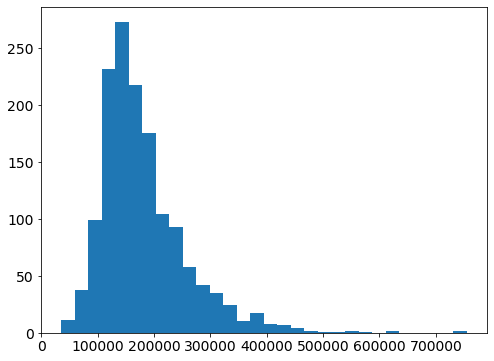

In [ ]:
# Распределение целевой переменной
plt.hist(data['SalePrice'], bins=30)
plt.show()

In [ ]:
# Распределение количественных признаков
data_num_features = data.select_dtypes(include=['float64', 'int64'])
data_num_features.drop('SalePrice', axis=1, inplace=True)

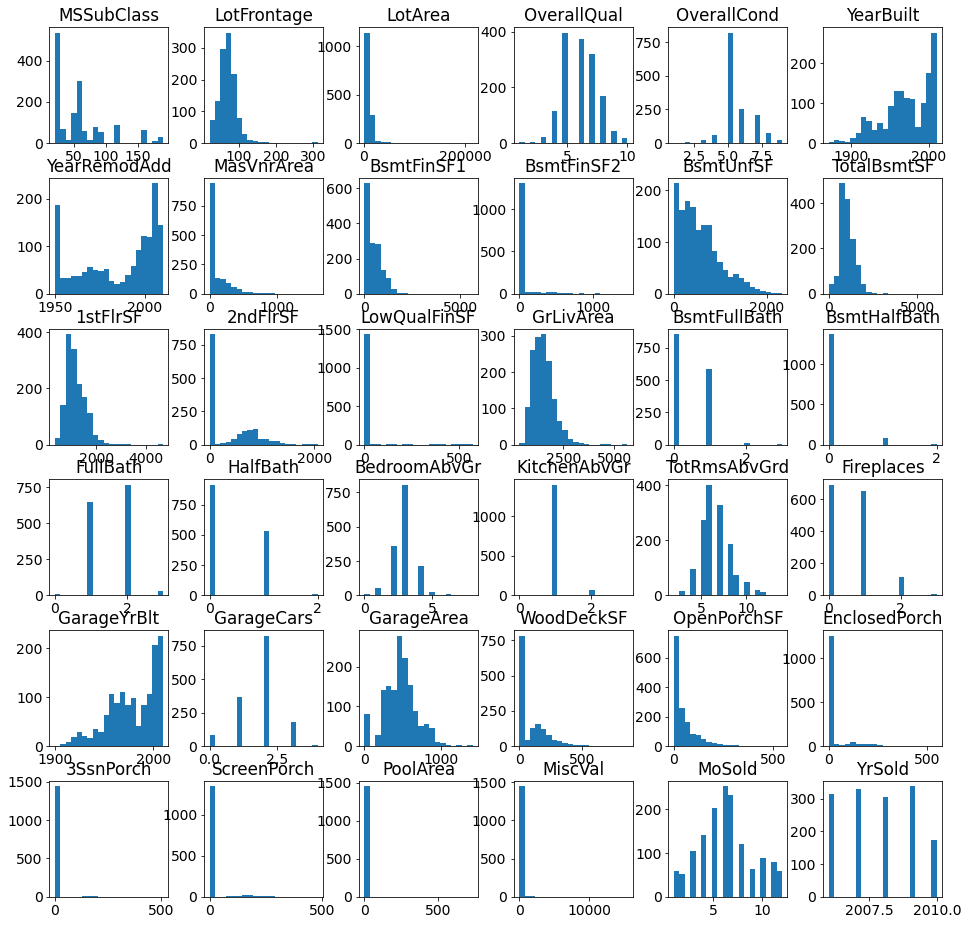

In [ ]:
# data_num_features.hist(figsize=(16,16), bins=20, grid=False);

Возможно, некоторые признаки стоит исключить из рассмотрения, например, PoolArea.

In [ ]:
data['PoolArea'].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

Построим pairplot для некоторых признаков + целевая переменная

In [ ]:
columns_to_pairplot = ['MSSubClass', 'YearBuilt', 'YearRemodAdd',
                       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
                       '1stFlrSF', 'GrLivArea', 'GarageYrBlt', 'SalePrice']

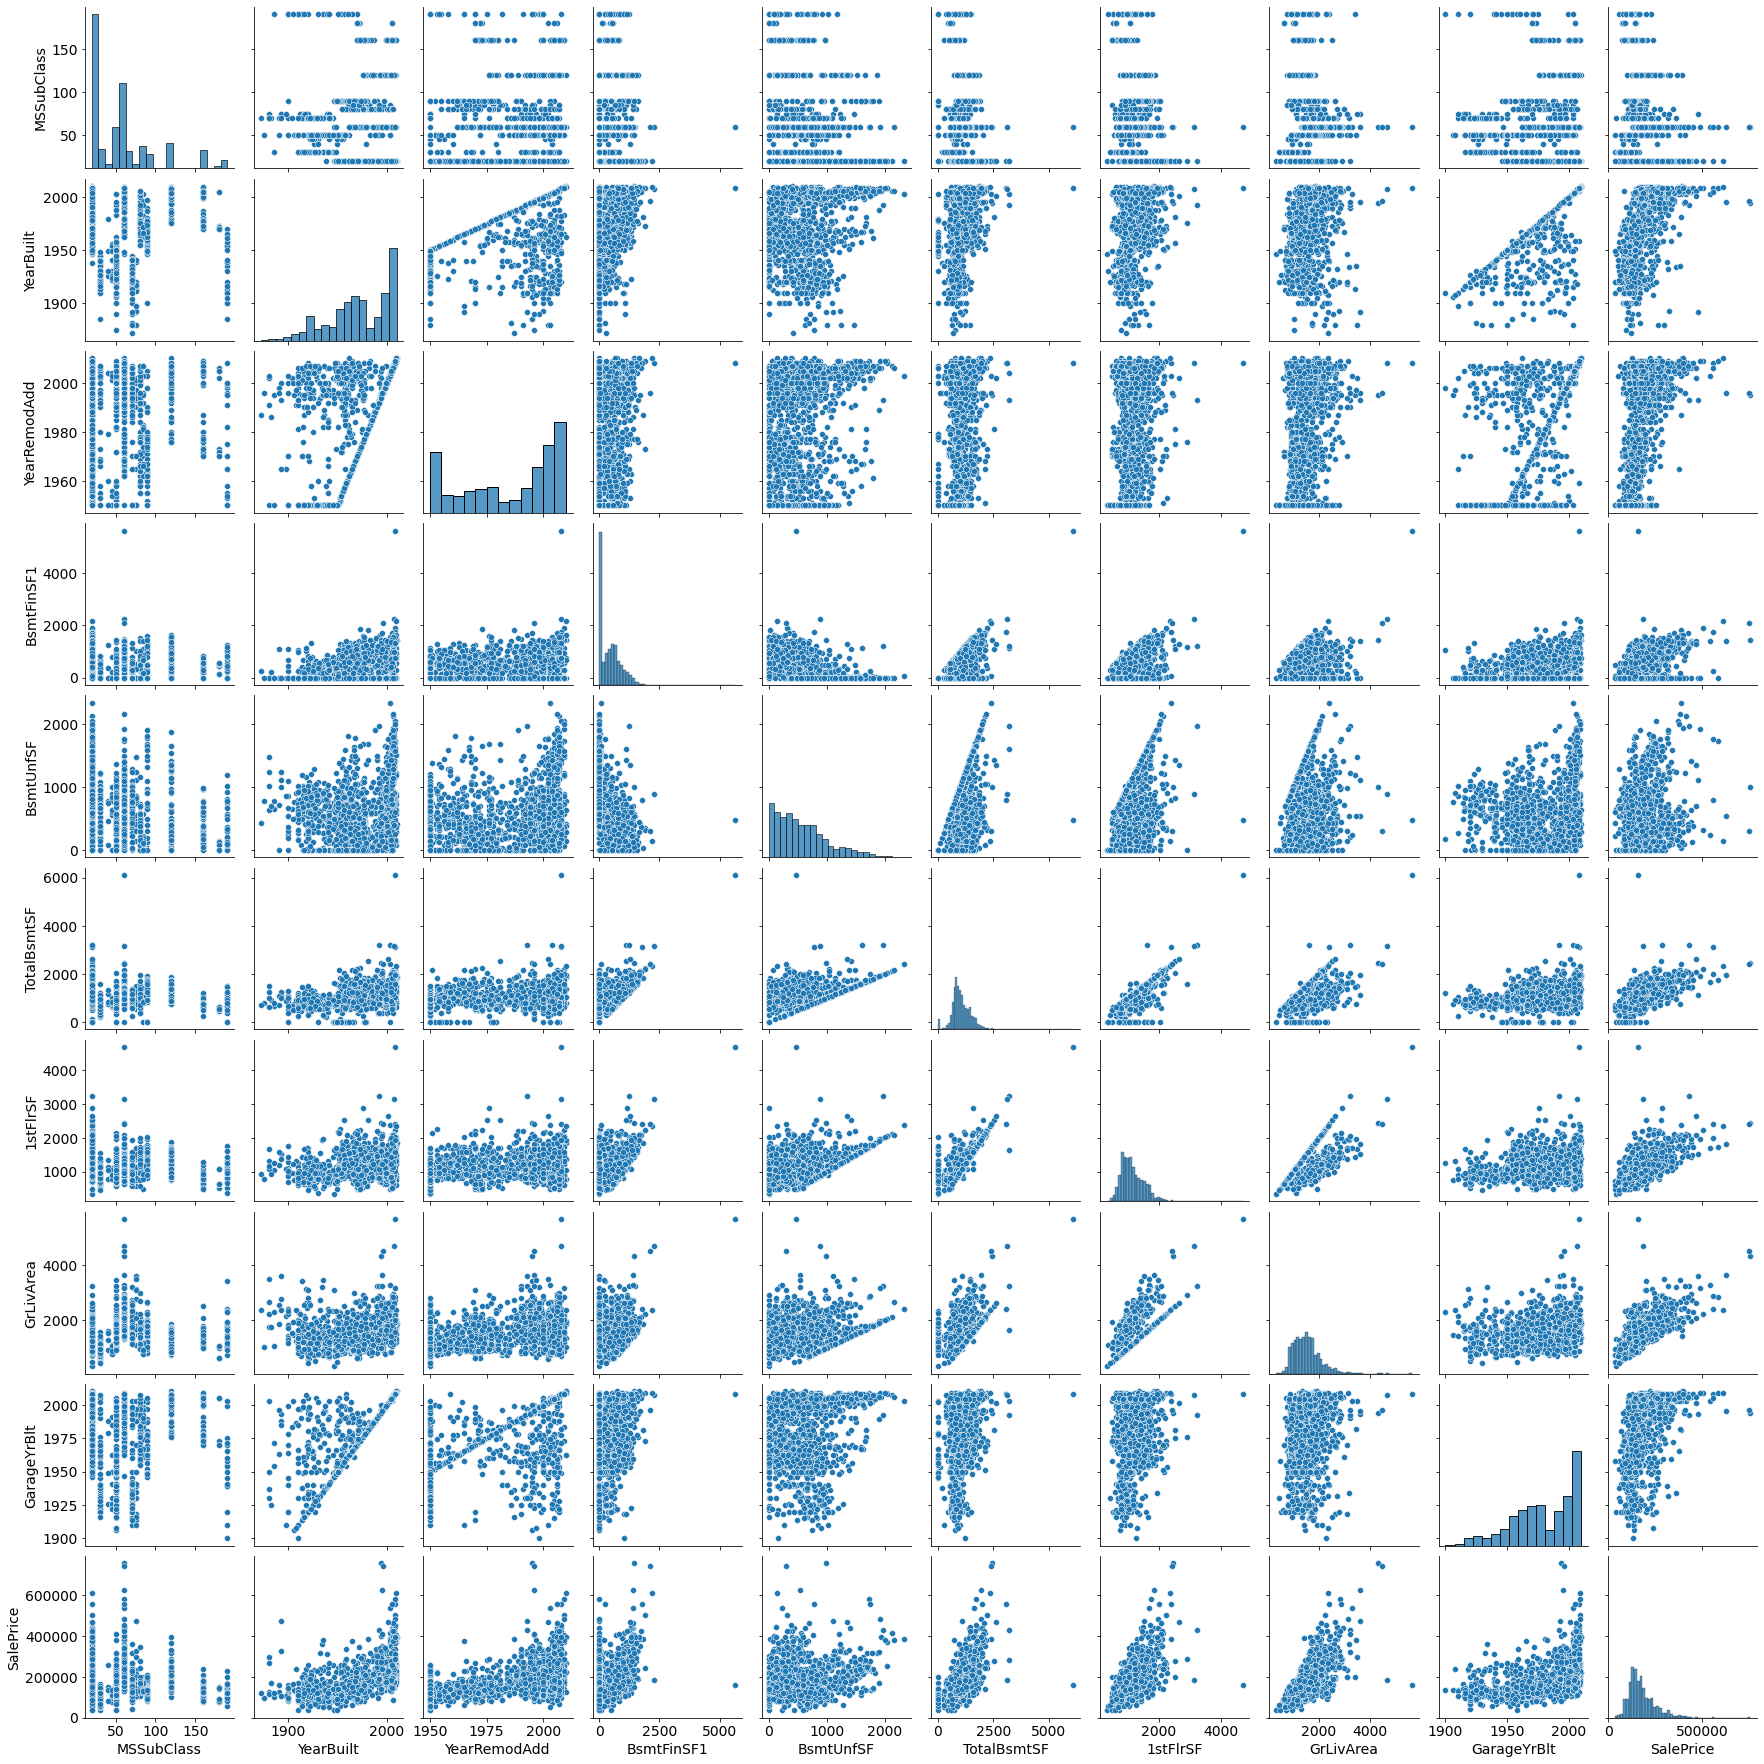

In [ ]:
# sns.pairplot(data[columns_to_pairplot])

Видно, что от некоторых из избранных признаков таргет (SalePrice) зависит почти линейно. 

In [ ]:
# Категориальные признаки
data_cat_features = data.select_dtypes(include=['object'])
data_cat_features

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal


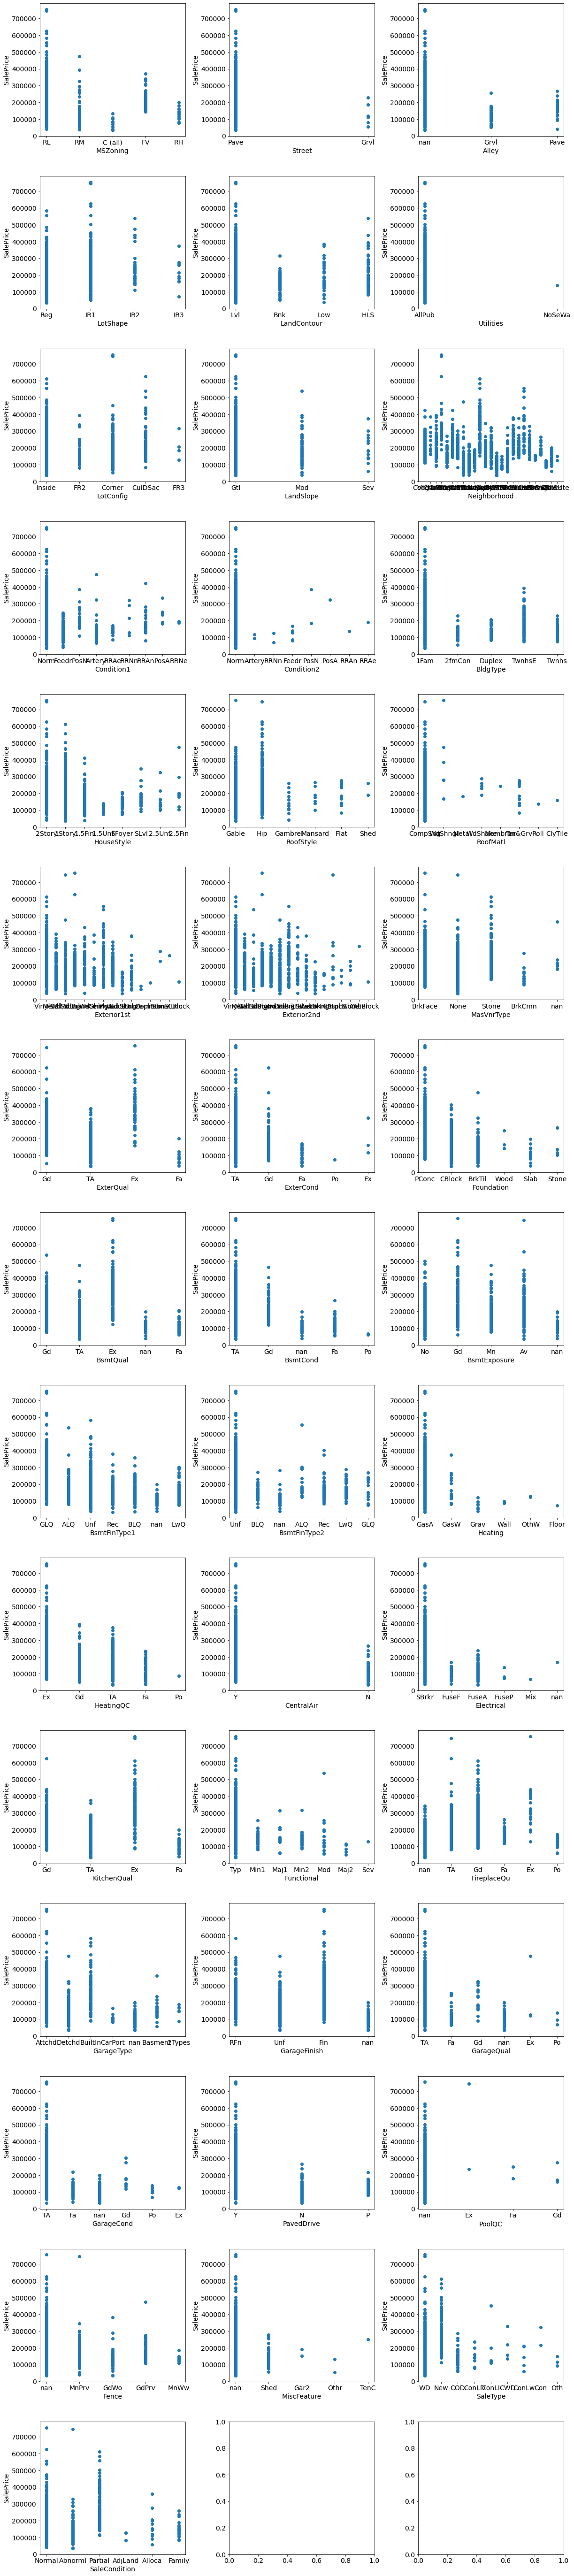

In [ ]:
# fig, ax = plt.subplots(15, 3, figsize=(20, 100))
# ax = ax.flatten()

# for i, col in enumerate(data_cat_features.columns):
#     ax[i].scatter(data_cat_features[col].fillna('nan'), data['SalePrice'])
#     ax[i].set_ylabel('SalePrice')
#     ax[i].set_xlabel(col)

# fig.subplots_adjust(hspace= 0.3, wspace=0.3)

In [ ]:
data['Utilities'].value_counts() # удалить из датасета

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

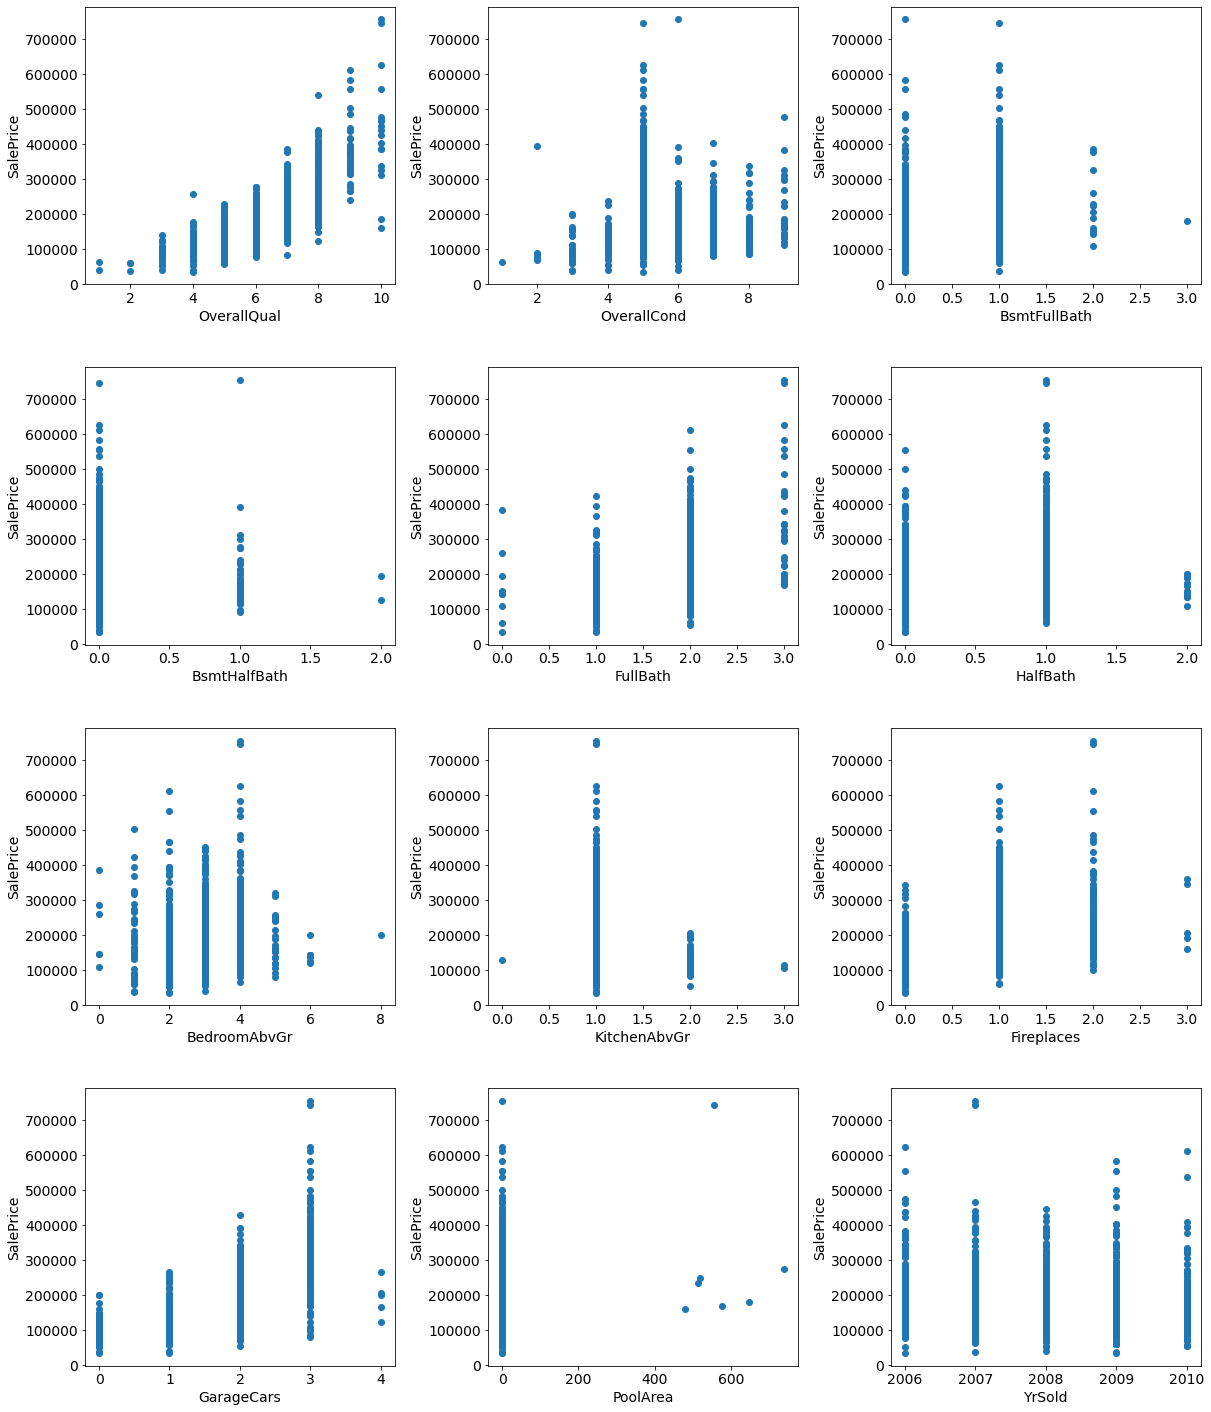

In [ ]:
# некоторые количественные фичи на самом деле категориальные
fig, ax = plt.subplots(4, 3, figsize=(20, 25))
ax = ax.flatten()

i = 0
for col in data_num_features.columns:
    cnt = data[col].value_counts()
    if len(cnt) <= 10: 
        ax[i].scatter(data[col], data['SalePrice'])
        ax[i].set_ylabel('SalePrice')
        ax[i].set_xlabel(col)
        i += 1
        
fig.subplots_adjust(hspace= 0.3, wspace=0.3)

В дальнейшем следует удалить признаки 'Utilities' и 'PoolArea', '3SsnPorch', 'MiscVal' и другие.

####***3. Предобработка данных (Пропуски, выбросы, масштабирование при необходимости)***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Пропуски в столбце LotFrontage

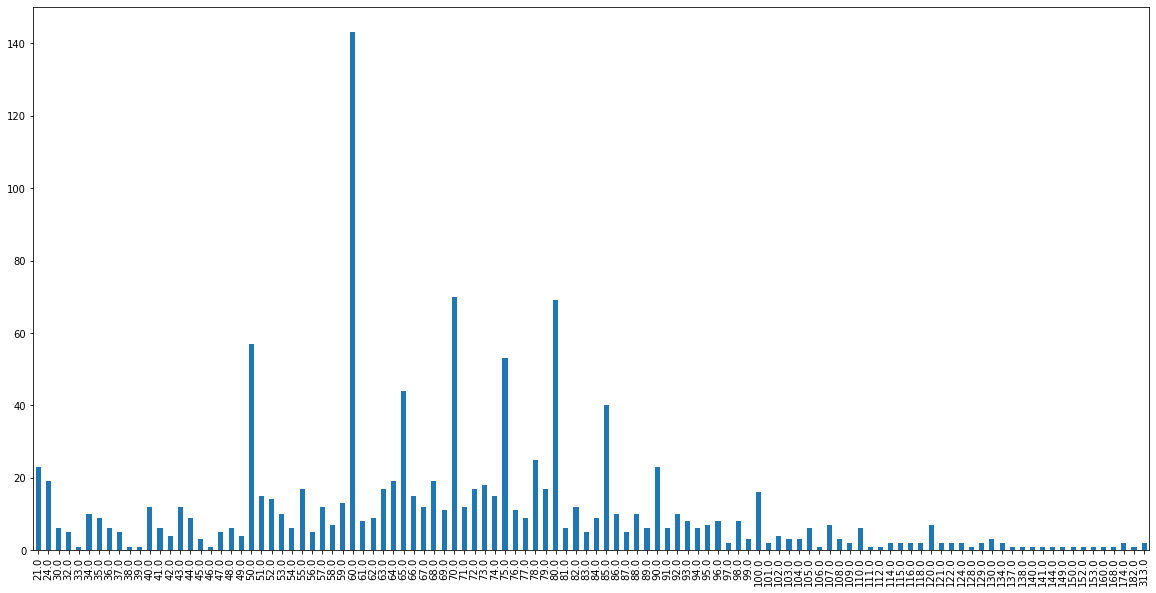

In [ ]:
data['LotFrontage'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10), fontsize=10)

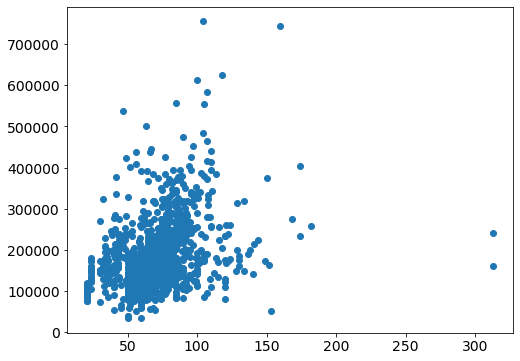

In [ ]:
plt.scatter(data['LotFrontage'], data['SalePrice'])

Возможно, подойдёт простая замена пропущенных значений модой:


In [ ]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mode()[0])

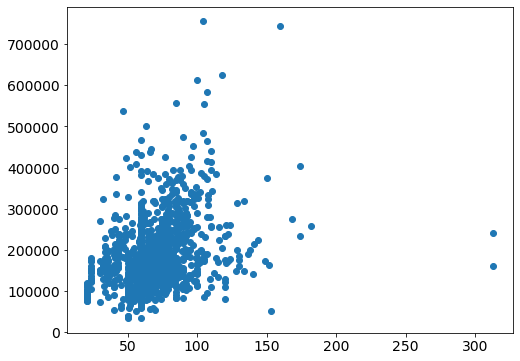

In [ ]:
plt.scatter(data['LotFrontage'], data['SalePrice'])

Однако, этот признак может оказаться достаточно информативным и тогда, лучше было бы обработать пропуски как-то умнее.

Пропуски в столбце Alley

В столбце Alley только 91 значение не пустое, возможно, стоит посмотреть на характеристики распределения по этому столбцу.

In [ ]:
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [ ]:
data[data['Alley'] == 'Grvl']['SalePrice'].median(), \
data[data['Alley'] == 'Pave']['SalePrice'].median()

(119500.0, 172500.0)

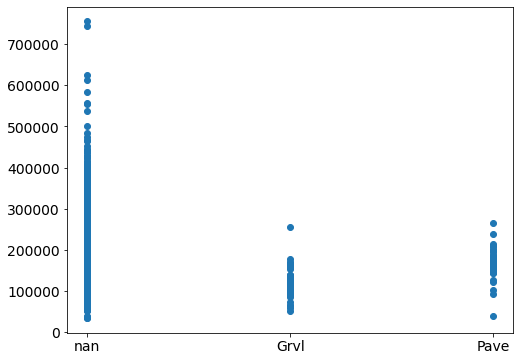

In [ ]:
plt.scatter(data['Alley'].fillna('nan'), data['SalePrice'])

Медианы сильно отличаются, возможно, стоит использовать one hot encoding для признака Alley. 

In [ ]:
ohe_1 = pd.get_dummies(data['Alley'].fillna('nan'), prefix='Alley')
data = pd.concat([ohe_1, data.drop(['Alley'], axis=1)], axis=1)

Пропуски в остальных столбцах

* MasVnrType

In [ ]:
data['MasVnrType'].fillna('nan').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
nan          8
Name: MasVnrType, dtype: int64

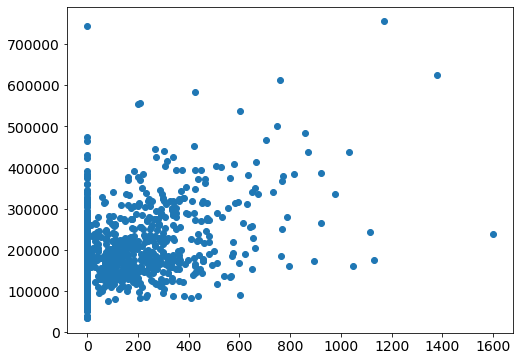

In [ ]:
plt.scatter(data['MasVnrArea'].fillna(0), data['SalePrice'])

In [ ]:
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])

* MasVnrArea

In [ ]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mode()[0])

* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2

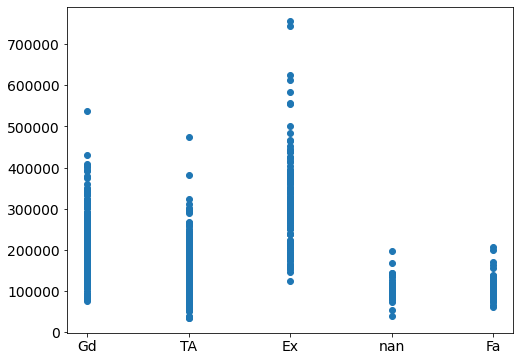

In [ ]:
plt.scatter(data['BsmtQual'].fillna('nan'), data['SalePrice'])

In [ ]:
data['BsmtQual'] = data['BsmtQual'].fillna('nan')
data['BsmtCond'] = data['BsmtCond'].fillna('nan')
data['BsmtExposure'] = data['BsmtExposure'].fillna('nan')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('nan')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('nan')

* Electrical

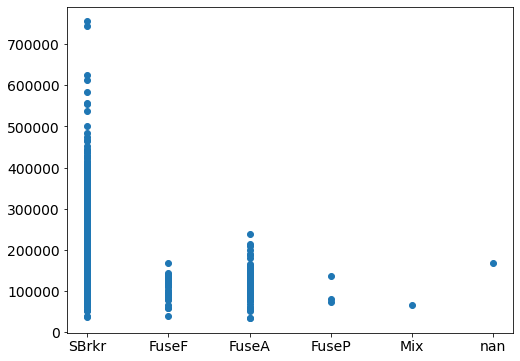

In [ ]:
plt.scatter(data['Electrical'].fillna('nan'), data['SalePrice'])

In [ ]:
data = data.drop(data[data['Electrical'].fillna('nan') == 'nan'].index)

* GarageType, GarageFinish, GarageQual, GarageCond, GarageYrBlt

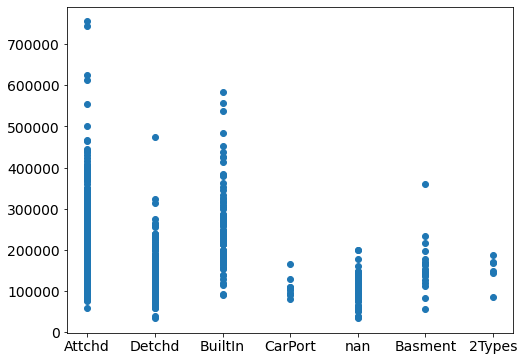

In [ ]:
plt.scatter(data['GarageType'].fillna('nan'), data['SalePrice'])

In [ ]:
data['GarageType'] = data['GarageType'].fillna('nan')
data['GarageFinish'] = data['GarageFinish'].fillna('nan')
data['GarageQual'] = data['GarageQual'].fillna('nan')
data['GarageCond'] = data['GarageCond'].fillna('nan')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(1920)

* FireplaceQu

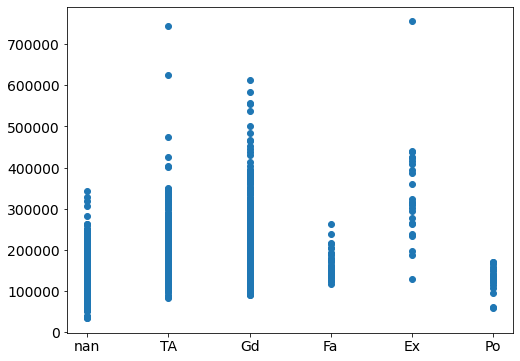

In [ ]:
plt.scatter(data['FireplaceQu'].fillna('nan'), data['SalePrice'])

In [ ]:
data['FireplaceQu'] = data['FireplaceQu'].fillna('nan')

* PoolQC, Fence, MiscFeature

In [ ]:
data = data.drop(['PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alley_Grvl     1459 non-null   uint8  
 1   Alley_Pave     1459 non-null   uint8  
 2   Alley_nan      1459 non-null   uint8  
 3   MSSubClass     1459 non-null   int64  
 4   MSZoning       1459 non-null   object 
 5   LotFrontage    1459 non-null   float64
 6   LotArea        1459 non-null   int64  
 7   Street         1459 non-null   object 
 8   LotShape       1459 non-null   object 
 9   LandContour    1459 non-null   object 
 10  Utilities      1459 non-null   object 
 11  LotConfig      1459 non-null   object 
 12  LandSlope      1459 non-null   object 
 13  Neighborhood   1459 non-null   object 
 14  Condition1     1459 non-null   object 
 15  Condition2     1459 non-null   object 
 16  BldgType       1459 non-null   object 
 17  HouseStyle     1459 non-null   object 
 18  OverallQ

In [ ]:
another_cat_features = ['OverallQual', 'OverallCond', 'BsmtFullBath', 
                        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                         'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'YrSold']

for feature in another_cat_features:
    data[feature] = data[feature].values.astype('object')

####***4. Обучение модели, проверка качества, submission***

In [ ]:
y = data['SalePrice']
y

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1459, dtype: int64

In [ ]:
X = data.drop(['SalePrice'], axis=1)
X

,Alley_Grvl,Alley_Pave,Alley_nan,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
2,0,0,1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
3,0,0,1,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
4,0,0,1,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
5,0,0,1,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,0,1,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal
1457,0,0,1,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal
1458,0,0,1,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Сначала обучим CatBoostRegressor на всех оставшихся признаках, затем удалим 'Utilities' и 'PoolArea', '3SsnPorch', 'MiscVal'.

In [ ]:
!pip install catboost

In [ ]:
from catboost import Pool, CatBoostRegressor

In [ ]:
data_cat_features = data.select_dtypes(include=['object'])

In [ ]:
train_pool = Pool(X_train, 
                  y_train, 
                  cat_features=list(data_cat_features.columns))
test_pool = Pool(X_test, 
                 cat_features=list(data_cat_features.columns))

In [ ]:
catb_model = CatBoostRegressor(loss_function='RMSE', iterations=100)

In [ ]:
catb_model.fit(train_pool)

Learning rate set to 0.269988
0:	learn: 67788.0507146	total: 24.8ms	remaining: 2.46s
1:	learn: 58306.5047935	total: 38.2ms	remaining: 1.87s
2:	learn: 52277.1843009	total: 53ms	remaining: 1.71s
3:	learn: 46714.8594825	total: 67.7ms	remaining: 1.62s
4:	learn: 42927.9169960	total: 79ms	remaining: 1.5s
5:	learn: 39354.6945247	total: 90.9ms	remaining: 1.42s
6:	learn: 36454.1667189	total: 103ms	remaining: 1.37s
7:	learn: 34294.7411322	total: 115ms	remaining: 1.32s
8:	learn: 32618.8602558	total: 126ms	remaining: 1.27s
9:	learn: 31443.4900832	total: 137ms	remaining: 1.23s
10:	learn: 29875.5596359	total: 148ms	remaining: 1.2s
11:	learn: 29409.5154387	total: 159ms	remaining: 1.17s
12:	learn: 29068.7302243	total: 165ms	remaining: 1.1s
13:	learn: 27811.9762272	total: 187ms	remaining: 1.15s
14:	learn: 26805.7295489	total: 204ms	remaining: 1.15s
15:	learn: 26217.3695504	total: 215ms	remaining: 1.13s
16:	learn: 25563.1173708	total: 227ms	remaining: 1.11s
17:	learn: 24875.6371641	total: 239ms	remainin

In [ ]:
preds = catb_model.predict(test_pool)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(np.log(y_test), np.log(preds)))

0.12434318693953632

In [ ]:
# iterations=10000, depth=5, learning_rate=1
# 0.17481367027271202, leaderboard: 0.17322

# iterations=20000, depth=6, learning_rate=1
# 0.18647159984745607, leaderboard: 0.18413

# iterations=20000, depth=4, learning_rate=0.9
# 0.18284855537819925, leaderboard: 

# без настройки iterations=1000
# 0.13186091519488094 leaderboard: 0.12957

# iterations=10000
# 0.12593630852943333

In [ ]:
sub_test = pd.read_csv('test.csv')

In [ ]:
sub_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [ ]:
sub_test['LotFrontage'] = sub_test['LotFrontage'].fillna(data['LotFrontage'].mode()[0])
sub_test['FireplaceQu'] = sub_test['FireplaceQu'].fillna('nan')
sub_test = sub_test.drop(['PoolQC', 'Fence', 'MiscFeature'], axis=1)
sub_test['GarageType'] = sub_test['GarageType'].fillna('nan')
sub_test['GarageFinish'] = sub_test['GarageFinish'].fillna('nan')
sub_test['GarageQual'] = sub_test['GarageQual'].fillna('nan')
sub_test['GarageCond'] = sub_test['GarageCond'].fillna('nan')
sub_test['GarageYrBlt'] = sub_test['GarageYrBlt'].fillna(1920)
sub_test['BsmtQual'] = sub_test['BsmtQual'].fillna('nan')
sub_test['BsmtCond'] = sub_test['BsmtCond'].fillna('nan')
sub_test['BsmtExposure'] = sub_test['BsmtExposure'].fillna('nan')
sub_test['BsmtFinType1'] = sub_test['BsmtFinType1'].fillna('nan')
sub_test['BsmtFinType2'] = sub_test['BsmtFinType2'].fillna('nan')
sub_test['MasVnrType'] = sub_test['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
ohe_1 = pd.get_dummies(sub_test['Alley'].fillna('nan'), prefix='Alley')
sub_test = pd.concat([ohe_1, sub_test.drop(['Alley'], axis=1)], axis=1)
sub_test['MasVnrArea'] = sub_test['MasVnrArea'].fillna(sub_test['MasVnrArea'].mode()[0])

ids = sub_test['Id']
sub_test = sub_test.drop(['Id'], axis=1)

for column in sub_test.columns:
    if sub_test[column].dtype == 'float64':
        sub_test[column] = sub_test[column].fillna(data[column].median())
    else:
        sub_test[column] = sub_test[column].fillna(data[column].mode()[0])

for feature in another_cat_features:
    sub_test[feature] = sub_test[feature].values.astype('int').astype('object')

In [ ]:
sub_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alley_Grvl     1459 non-null   uint8  
 1   Alley_Pave     1459 non-null   uint8  
 2   Alley_nan      1459 non-null   uint8  
 3   MSSubClass     1459 non-null   int64  
 4   MSZoning       1459 non-null   object 
 5   LotFrontage    1459 non-null   float64
 6   LotArea        1459 non-null   int64  
 7   Street         1459 non-null   object 
 8   LotShape       1459 non-null   object 
 9   LandContour    1459 non-null   object 
 10  Utilities      1459 non-null   object 
 11  LotConfig      1459 non-null   object 
 12  LandSlope      1459 non-null   object 
 13  Neighborhood   1459 non-null   object 
 14  Condition1     1459 non-null   object 
 15  Condition2     1459 non-null   object 
 16  BldgType       1459 non-null   object 
 17  HouseStyle     1459 non-null   object 
 18  OverallQ

In [ ]:
sub_test_cat_features = sub_test.select_dtypes(include=['object'])

In [ ]:
sub_test_pool = Pool(sub_test, 
                     cat_features=list(sub_test_cat_features.columns))

In [ ]:
sub_preds = catb_model.predict(sub_test_pool)

In [ ]:
sub_preds

array([123809.42916694, 177682.23059153, 181870.29474429, ...,
       149857.13473987, 116050.06821647, 230470.62319276])

In [ ]:
results = pd.DataFrame(sub_preds, index=ids, columns=['SalePrice'])

In [ ]:
results

,SalePrice
Id,
1461,123809.429167
1462,177682.230592
1463,181870.294744
1464,203903.053659
1465,177906.988682
...,...
2915,79478.435378
2916,81406.671186
2917,149857.134740


In [ ]:
results.to_csv('submit2.txt', sep=',')
# best 0.12957

### Дополнительные задания

1) Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
data = load_wine()

2) Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data_keys = data.keys()
data_keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

3) Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.


In [ ]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

4) Сколько классов содержит целевая переменная датасета? Выведите названия классов.

In [ ]:
len(data.target_names)

3

In [ ]:
for trg_name in data.target_names:
    print(trg_name)

class_0
class_1
class_2


5) На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.

In [ ]:
X = pd.DataFrame(data=data.data, columns=data.feature_names)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


6) Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

7) Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
X['target'] = data.target.astype('int64')

In [ ]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


8) Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

In [ ]:
X_corr = X.corr()

In [ ]:
X_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


9) Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).

In [ ]:
high_corr = list(X_corr['target'].drop(['target'])[np.abs(X_corr['target']) > 0.5].index)

In [ ]:
high_corr

['alcalinity_of_ash',
 'total_phenols',
 'flavanoids',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

10) Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.

In [ ]:
y = X['target']

In [ ]:
X = X.drop(['target'], axis=1)

In [ ]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
for feature in high_corr:
    X[f'{feature}_2'] = pow(X[feature].values, 2)

In [ ]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,243.36,7.8400,9.3636,1.0816,15.3664,1134225.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,125.44,7.0225,7.6176,1.1025,11.5600,1102500.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,345.96,7.8400,10.4976,1.0609,10.0489,1404225.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,282.24,14.8225,12.1801,0.7396,11.9025,2190400.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,441.00,7.8400,7.2361,1.0816,8.5849,540225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,420.25,2.8224,0.3721,0.4096,3.0276,547600.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,529.00,3.2400,0.5625,0.4900,2.4336,562500.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,400.00,2.5281,0.4761,0.3481,2.4336,697225.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,400.00,2.7225,0.4624,0.3600,2.6244,705600.0


In [ ]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,391.142865,5.657030,5.110049,0.968661,7.322155,6.564591e+05
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,133.671775,2.936294,4.211441,0.443798,3.584316,5.558591e+05
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,112.360000,0.960400,0.115600,0.230400,1.612900,7.728400e+04
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,295.840000,3.036325,1.452100,0.612325,3.754075,2.505010e+05
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,380.250000,5.546050,4.558250,0.931250,7.728400,4.536045e+05
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,462.250000,7.840000,8.265700,1.254400,10.048900,9.702250e+05
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,900.000000,15.054400,25.806400,2.924100,16.000000,2.822400e+06


### **Дополнительные задания по numpy и pandas

1. Необходимо реализовать метод сортировки целых (int) элементов. Метод должен быть реализован без использования “готовых” методов (sorted, np.sort()).

In [ ]:
import numpy as np

In [ ]:
a = np.arange(50)
np.random.shuffle(a)

In [ ]:
print(a)

[22 28  5 46 47  7 14 37 13  1  9 19 12 44 33 15 31 38 26 18 43  2  8  4
 17 24  6 16 35 21 20 42 39 25 27 23 48 30 29 11  3 40 45 34  0 49 41 10
 32 36]


In [ ]:
def merge(left, right):
    result = []
    i, j = 0, 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    while i < len(left):
        result.append(left[i])
        i += 1
    while j < len(right):
        result.append(right[j])
        j += 1
    return result


def merge_sort(arr):
    if len(arr) < 2:
        return arr[:]
    else:
        middle = len(arr) // 2
        left = merge_sort(arr[:middle])
        right = merge_sort(arr[middle:])
        return np.array(merge(left, right))

In [ ]:
b = merge_sort(a)

In [ ]:
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

2. Вычисление метрик для мониторинга.

* суммарная выручка
* кол-во покупок
* средний чек
* среднее кол-во товаров в покупке

Дополнительно добавим возможность фильтровать данные по различным параметрам. Это может быть полезно чтобы посмотреть как меняются продажи в двух группах, или в какой-то отдельной категории товаров.

На вход функции будет подаваться датафрейм с данными о продажах, словарь с фильтрами и период, за который нужно посчитать метрики.

Функция должна вернуть датафрейм, в индексах которого будут все даты из указанного периода отсортированные по возрастанию, а столбцы - метрики ['revenue', 'number_purchases', 'average_check', 'average_number_items']. Формат данных столбцов - float, формат данных индекса - datetime64[ns].

Если в какие-то дни не было продаж, то нужно заполнить пропуск нулём.


In [ ]:
data = pd.DataFrame(
                    [[820, '2021-04-29', 1, 213], [100, '2021-04-29', 1, 213],
                    [600, '2021-04-30', 2, 113], [700, '2021-05-01', 3, 893]],
                    columns=['cost', 'date', 'sale_id', 'shop_id']
                    )

period_dict = {'begin': '2021-04-29', 'end': '2021-04-30'}

filters_dict = {'shop_id': [213, 893], 'sale_id':[1,2]}

In [ ]:
import numpy as np
import pandas as pd

def calculate_sales_metrics(df, cost_name, date_name, sale_id_name, period, 
                            filters=None):
    """Вычисляет метрики по продажам.
    df - pd.DataFrame, датафрейм с данными. Пример
        pd.DataFrame(
            [[820, '2021-04-03', 1, 213]],
            columns=['cost', 'date', 'sale_id', 'shop_id']
        )
    cost_name - str, название столбца с стоимостью товара
    date_name - str, название столбца с датой покупки
    sale_id_name - str, название столбца с идентификатором покупки (в одной покупке может быть несколько товаров)
    period - dict, словарь с датами начала и конца периода пилота.
        Пример, {'begin': '2020-01-01', 'end': '2020-01-08'}.
        Дата начала периода входит в полуинтервал, а дата окончания нет,
        то есть '2020-01-01' <= date < '2020-01-08'.
    filters - dict, словарь с фильтрами. Ключ - название поля, по которому фильтруем, значение - список значений,
        которые нужно оставить. Например, {'user_id': [111, 123, 943]}.
        Если None, то фильтровать не нужно.
    return - pd.DataFrame, в индексах все даты из указанного периода отсортированные по возрастанию,
        столбцы - метрики ['revenue', 'number_purchases', 'average_check', 'average_number_items'].
        Формат данных столбцов - float, формат данных индекса - datetime64[ns].
    """
    # YOUR_CODE_HERE

    if filters is not None:
        for column_to_filter in filters:
            df = df[df[column_to_filter].isin(filters[column_to_filter])]
    
    df = df[(df[date_name].astype('datetime64[ns]') >= period['begin']) &
            (df[date_name].astype('datetime64[ns]') < period['end'])]

    dates = pd.date_range(period['begin'], period['end'], closed='left'
                      ).strftime('%Y-%m-%d').tolist()
    
    revenue = []
    number_purchases = []
    average_check = [] 
    average_number_items = []

    for date in dates:
        one_day = df[df[date_name] == date]
        one_day_group = one_day.groupby('sale_id')

        day_revenue = np.sum(one_day[cost_name])
        day_number_purchases = len(one_day_group)

        revenue.append(day_revenue)
        number_purchases.append(day_number_purchases)
        average_check.append(day_revenue / day_number_purchases)
        
        day_sum_number_items = 0
        for sale in one_day_group:
            day_sum_number_items += len(sale[1])
        
        if day_number_purchases != 0:
            average_number_items.append(day_sum_number_items / day_number_purchases)
        else:
            average_number_items.append(0)

    result_df = pd.DataFrame(data=np.array([revenue, number_purchases, 
                                            average_check, 
                                            average_number_items], 
                                           dtype='float').T,
                             index=np.array(dates, dtype='datetime64[ns]'),
                             columns=['revenue', 'number_purchases', 
                                      'average_check', 
                                      'average_number_items']
                             ).fillna(0)

    return result_df

In [ ]:
statistics = calculate_sales_metrics(data, 'cost', 'date', 'sale_id', period_dict, 
                            filters_dict)

In [ ]:
statistics

,revenue,number_purchases,average_check,average_number_items
2021-04-29,920.0,1.0,920.0,2.0
